# 1_Business Understanding

Our Machine learning AI track will use MAP and machine learning in order to resolve the two follwing problems : 
    1. Profiling the suspect 
    2. Predicting the number of homicides in the upcoming years by city.

In fact, when a murder happen, police need to find out the murder. There are many technics and tools such as DNA, questionaray...One other technic is to use the historical information from MAP to try to find out the caracteristics or the profile of Prepetrator.

So, using supervised learning approch, our model will learn from the solved Crime based on the main information input such as Victim Sex, age, race ethnicity, state, city, weapon (to be checked during data understanding) and their corresponding murder caracteristics Sex, age, race, ethnicity, relationship, victim counts, preperator count. we will evaluate many models in order to choice the best one who can guess the profile of the furtur suspects. Also we will try to guess the unresolved case using our model.

Then, as preventive actions we will use the MAP database in order estimate the expecting homicide in the futurs by city and by state. one of the use case of this prediction is manage ressource and effort and make a better control in order to avoid that such homicide happens.

# Importing Libraries

In [2]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import plot, iplot
# importing dataset
df01= pd.read_csv ('database.csv')
df01

c:\python3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.



,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [4]:
df01.isnull().sum()


Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

# - Data requirements
- What data do you need to answer? 
- The Data comes from the MAP which focus to track and attempt to solve unsolved cases involving homicide.
- Is the data that you collected representative to the problem? (Data Understanding)


In [5]:
from sklearn.preprocessing import LabelEncoder


In [7]:
df01.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

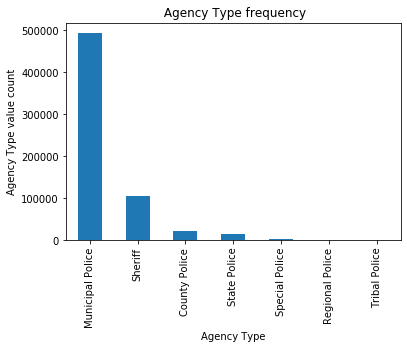

In [4]:
plt.xlabel("Agency Type")
plt.ylabel("Agency Type value count")
plt.title(" Agency Type frequency")
vc=df01['Agency Type'].value_counts()
vc.plot.bar()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

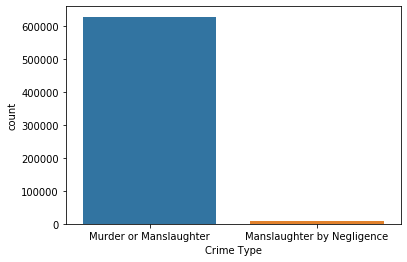

In [5]:
sns.countplot(x='Crime Type', data=df01)
plt.xticks()

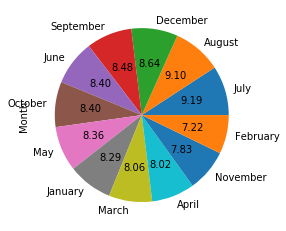

In [6]:

df02=df01['Month'].value_counts()
df02.plot(kind='pie', autopct="%.2f")

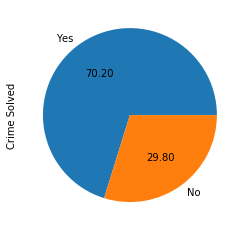

In [44]:
df02=df01['Crime Solved'].value_counts()
df02.plot(kind='pie', autopct="%.2f")

In [14]:
df01.replace(['Rhodes Island'],['Rhode Island'], inplace=True)
df01['State'].value_counts()


California              99783
Texas                   62095
New York                49268
Florida                 37164
Michigan                28448
Illinois                25871
Pennsylvania            24236
Georgia                 21088
North Carolina          20390
Louisiana               19629
Ohio                    19158
Maryland                17312
Virginia                15520
Tennessee               14930
Missouri                14832
New Jersey              14132
Arizona                 12871
South Carolina          11698
Indiana                 11463
Alabama                 11376
Oklahoma                 8809
Washington               7815
District of Columbia     7115
Arkansas                 6947
Colorado                 6593
Kentucky                 6554
Mississippi              6546
Wisconsin                6191
Massachusetts            6036
Nevada                   5553
Connecticut              4896
New Mexico               4272
Oregon                   4217
Minnesota 

C:\Users\PROXY INFO\anaconda3\envs\GoT\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\PROXY INFO\anaconda3\envs\GoT\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


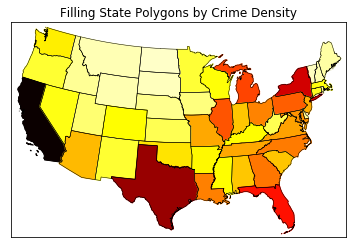

In [17]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49, projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
shp_info = m.readshapefile('C:\\Users\\PROXY INFO\\Downloads\\st99_d00','states',drawbounds=True)
colors={}
statenames=[]
cmap = plt.cm.hot 
vmin = 0; vmax = 100000 
for shapedict in m.states_info:
    statename = shapedict['NAME']
   
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = state01[statename]
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
ax = plt.gca()
for nshape,seg in enumerate(m.states):
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Filling State Polygons by Crime Density')
plt.show()

Victim caractistic

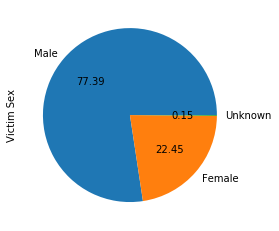

In [37]:
df02=df01['Victim Sex'].value_counts()
df02.plot(kind='pie', autopct="%.2f")

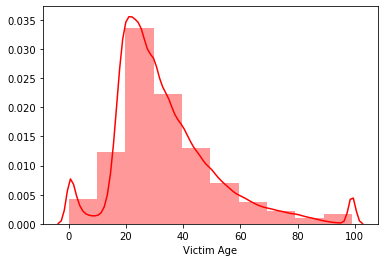

In [34]:
import seaborn as sns
sns.distplot(df01['Victim Age'], bins=10 ,hist=True, kde=True, color="Red")


In [51]:
df01['Victim Age'].max()

998

In [33]:
df04=df01.loc[df01['Victim Age']<=100]
df04

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [30]:
df03=df01.loc[df01['Victim Age']>100]
df03

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source


In [31]:
df03['Victim Age'].value_counts()

Series([], Name: Victim Age, dtype: int64)

In [32]:
df04['Victim Age'].median()

30.0

# - Transformation1 Victim Age =998 by median Victim Age <100

In [28]:
df01['Victim Age'].replace('998',df04['Victim Age'].median(),inplace=True)

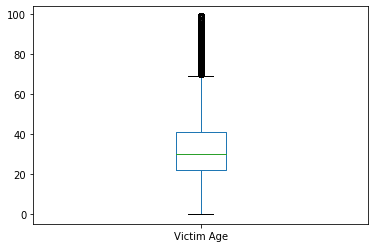

In [73]:
df01['Victim Age'].plot.box()

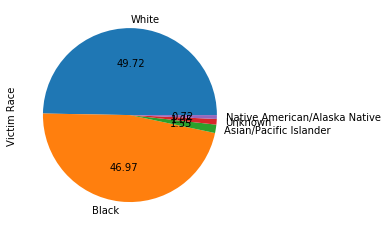

In [67]:
df02=df01['Victim Race'].value_counts()
df02.plot(kind='pie', autopct="%.2f")

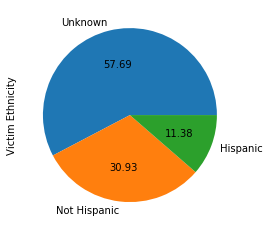

In [69]:
df02=df01['Victim Ethnicity'].value_counts()
df02.plot(kind='pie', autopct="%.2f")

In [50]:
df01.dtypes

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age          object
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object

In [71]:
df04=df01.loc[df01['Perpetrator Age']==0]
df04['Crime Solved'].value_counts()

No     184980
Yes     26099
Name: Crime Solved, dtype: int64

Crime Type               0
Crime Solved 


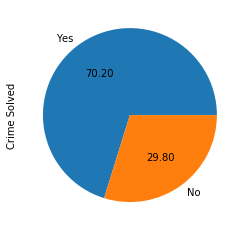

In [71]:
df02=df01['Crime Solved'].value_counts()
df02.plot(kind='pie', autopct="%.2f")

In [72]:
df01['Crime Solved'].value_counts()

Yes    448172
No     190282
Name: Crime Solved, dtype: int64

Incident                 0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source   

In [75]:
df01['Incident'].value_counts()

1      265528
2       71779
3       39236
4       27113
5       20658
        ...  
784        16
783        16
782        16
781        16
0          16
Name: Incident, Length: 1000, dtype: int64

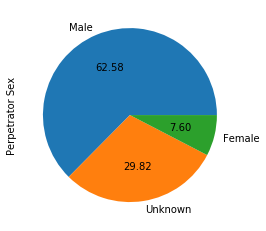

In [76]:
df02=df01['Perpetrator Sex'].value_counts()
df02.plot(kind='pie', autopct="%.2f")

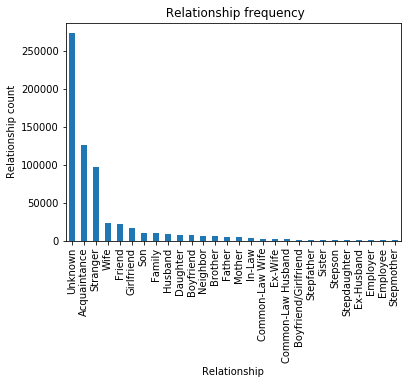

In [79]:
plt.xlabel("Relationship")
plt.ylabel("Relationship count")
plt.title(" Relationship frequency")
vc=df01['Relationship'].value_counts()
vc.plot.bar()

# Handgun; Perpetratod Male;Crime type Murder, agence type Municipale police are most frequents

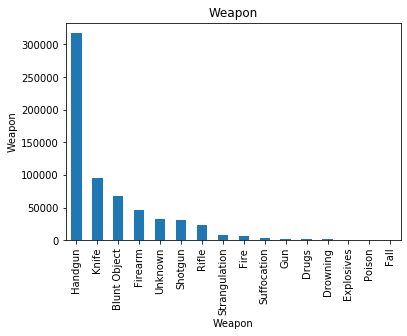

In [85]:
plt.xlabel("Weapon")
plt.ylabel("Weapon")
plt.title("Weapon")
vc=df01['Weapon'].value_counts()
vc.plot.bar()

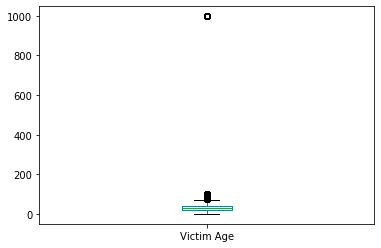

In [87]:
df01['Victim Age'].plot.box()

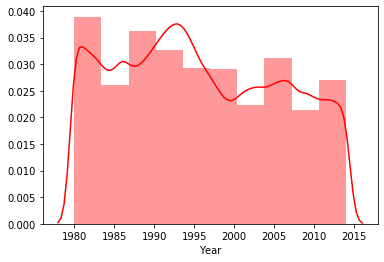

In [89]:
sns.distplot(df01['Year'], bins=10 ,hist=True, kde=True, color="Red")


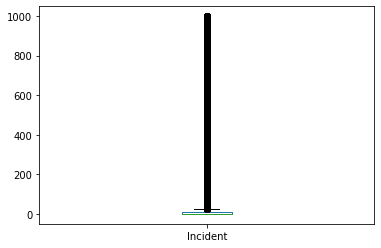

In [88]:
df01['Incident'].plot.box()

In [95]:
df01.loc[df01['Victim Ethnicity']=='Hispanic']['Victim Race'].value_counts()

White                            71199
Black                             1213
Unknown                            177
Asian/Pacific Islander              52
Native American/Alaska Native       11
Name: Victim Race, dtype: int64

In [96]:
Q3 = df04['Victim Age'].quantile(0.75)
Q1 = df04['Victim Age'].quantile(0.001)
IQR = Q3 - Q1


42.0

In [18]:
df01.loc[df01['Victim Age']==998]['Crime Solved'].value_counts()

No     605
Yes    369
Name: Crime Solved, dtype: int64

In [19]:
df01.loc[df01['Incident']>=120]['Crime Solved'].value_counts()

Yes    13475
No      7283
Name: Crime Solved, dtype: int64

In [2]:
df01['Victim Age'].replace([998],df01['Victim Age'].mean(), inplace=True)

In [23]:
df01['Victim Age'].value_counts()

22.0    23049
20.0    23031
25.0    22939
21.0    22796
23.0    22438
        ...  
94.0      116
95.0       82
97.0       39
96.0       37
98.0       33
Name: Victim Age, Length: 101, dtype: int64

In [27]:
df01['Victim Age'].mean()

33.564448873193115

In [19]:

df01['Perpetrator Age'].value_counts()

0     211079
20     21158
19     19807
21     18509
18     18477
       ...  
10         1
88         1
9          1
89         1
93         1
Name: Perpetrator Age, Length: 191, dtype: int64

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0

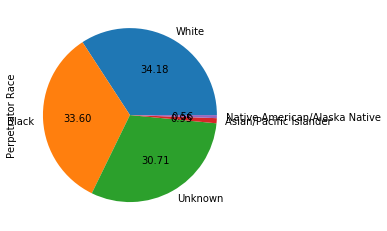

In [23]:
df02=df01['Perpetrator Race'].value_counts()
df02.plot(kind='pie', autopct="%.2f")

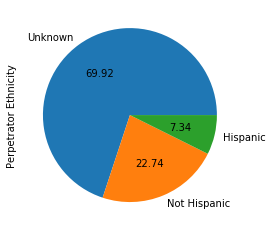

In [25]:
df02=df01['Perpetrator Ethnicity'].value_counts()
df02.plot(kind='pie', autopct="%.2f")

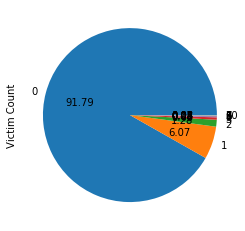

In [27]:
df02=df01['Victim Count'].value_counts()
df02.plot(kind='pie', autopct="%.2f")

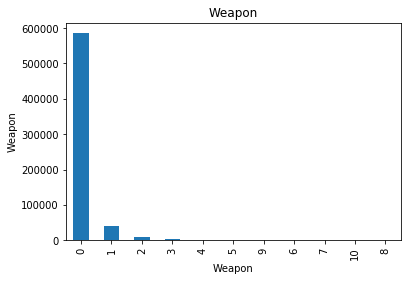

In [28]:
plt.xlabel("Weapon")
plt.ylabel("Weapon")
plt.title("Weapon")
vc=df01['Victim Count'].value_counts()
vc.plot.bar()

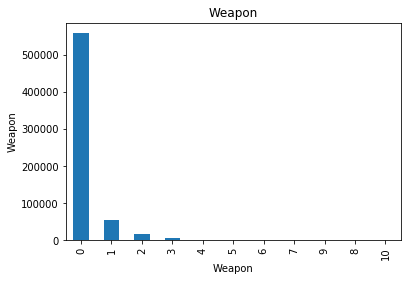

In [29]:
plt.xlabel("Weapon")
plt.ylabel("Weapon")
plt.title("Weapon")
vc=df01['Perpetrator Count'].value_counts()
vc.plot.bar()

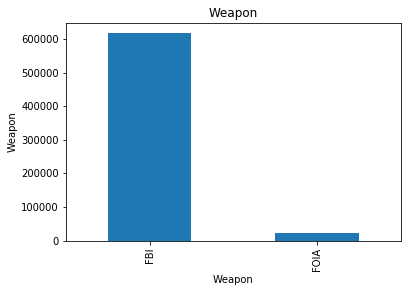

In [31]:
plt.xlabel("Weapon")
plt.ylabel("Weapon")
plt.title("Weapon")
vc=df01['Record Source'].value_counts()
vc.plot.bar()

In [80]:
dtr=df01.loc[df01['Crime Solved']=='No']
dtr['Year'].value_counts()
dtr

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
8,9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
10,11,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
14,15,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,August,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638418,638419,WV04401,Spencer,Municipal Police,Roane,West Virginia,2014,May,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
638436,638437,WVWSP60,State Police: Williamson,State Police,Mingo,West Virginia,2014,July,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Drugs,0,1,FBI
638437,638438,WVWSP65,Sp: Hundred,State Police,Wood,West Virginia,2014,January,1,Murder or Manslaughter,...,Unknown,Unknown,30,Unknown,Unknown,Acquaintance,Knife,0,2,FBI
638438,638439,WVWSP65,Sp: Hundred,State Police,Wood,West Virginia,2014,January,2,Murder or Manslaughter,...,Unknown,Unknown,50,Unknown,Unknown,Acquaintance,Knife,0,2,FBI


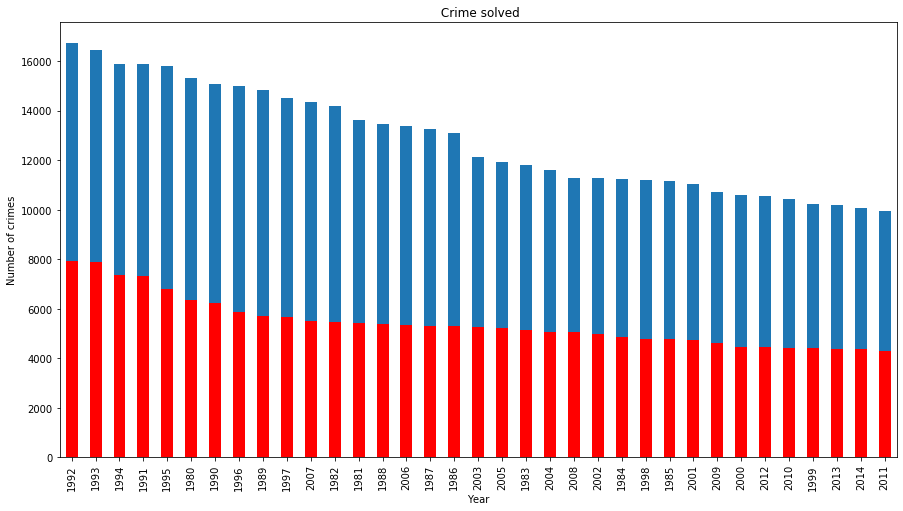

In [21]:
plt.xlabel("Year")
plt.ylabel("Number of crimes")
plt.title(" Crime solved")
vc=der['Year'].value_counts()
vc.plot.bar(rot=90,figsize=(15,8))
vd=dtr['Year'].value_counts()
vd.plot.bar(rot=90, color='Red',figsize=(15,8))


Record ID 0 Agency Code 0 Agency Name 0 Agency Type 0 City 0 State 0 Year 0 Month 0 Incident 0 Crime Type 0 Crime Solved 0 Victim Sex 0 Victim Age 0 Victim Race 0 Victim Ethnicity 0 Perpetrator Sex 0 Perpetrator Age 0 Perpetrator Race 0 Perpetrator Ethnicity 0 Relationship 0 Weapon 0 Victim Count 0 Perpetrator Count 0 Record Source 0

In [4]:
df02=df01.drop([ "Record ID","Agency Name","Victim Ethnicity","Perpetrator Ethnicity","Record Source"],axis =1)

df02

,Agency Code,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
0,AK00101,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14.0,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0,0
1,AK00101,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43.0,White,Male,42,White,Acquaintance,Strangulation,0,0
2,AK00101,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30.0,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,0
3,AK00101,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43.0,White,Male,42,White,Acquaintance,Strangulation,0,0
4,AK00101,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30.0,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,WY01500,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30.0,White,Unknown,0,Unknown,Unknown,Handgun,0,0
638450,WY01700,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62.0,White,Male,57,White,Acquaintance,Handgun,0,0
638451,WY01701,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0.0,Asian/Pacific Islander,Female,22,Asian/Pacific Islander,Daughter,Suffocation,0,0
638452,WY01800,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55.0,White,Male,31,White,Stranger,Knife,0,1


In [24]:
df02['Victim Race'].value_counts()

White                            317422
Black                            299899
Asian/Pacific Islander             9890
Unknown                            6676
Native American/Alaska Native      4567
Name: Victim Race, dtype: int64

In [27]:
race={"White":1,"Black":2,"Asian/Pacific Islander":3,"Native American/Alaska Native":4,"Unknown":0}
race

{'White': 1,
 'Black': 2,
 'Asian/Pacific Islander': 3,
 'Native American/Alaska Native': 4,
 'Unknown': 0}

In [28]:
df02['Perpetrator Sex'].value_counts()

Male       399541
Unknown    190365
Female      48548
Name: Perpetrator Sex, dtype: int64

In [31]:
sex={"Unknown":0,"Male":1,"Female":2}
df02['Agency Type'].value_counts()

Municipal Police    493026
Sheriff             105322
County Police        22693
State Police         14235
Special Police        2889
Regional Police        235
Tribal Police           54
Name: Agency Type, dtype: int64

In [49]:
df02['Month'].value_counts()

July         58696
August       58072
December     55187
September    54117
June         53662
October      53650
May          53394
January      52928
March        51444
April        51209
November     50016
February     46079
Name: Month, dtype: int64

In [50]:
month={"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12}
df02['Crime Type'].value_counts()

Murder or Manslaughter        629338
Manslaughter by Negligence      9116
Name: Crime Type, dtype: int64

In [63]:
df02['Relationship'].value_counts()


Unknown                 273013
Acquaintance            126018
Stranger                 96593
Wife                     23187
Friend                   21945
Girlfriend               16465
Son                       9904
Family                    9535
Husband                   8803
Daughter                  7539
Boyfriend                 7302
Neighbor                  6294
Brother                   5514
Father                    4361
Mother                    4248
In-Law                    3637
Common-Law Wife           2477
Ex-Wife                   1973
Common-Law Husband        1954
Boyfriend/Girlfriend      1383
Stepfather                1360
Sister                    1292
Stepson                   1170
Stepdaughter               754
Ex-Husband                 629
Employer                   509
Employee                   384
Stepmother                 211
Name: Relationship, dtype: int64

In [6]:
relationship={"Unknown":0,"Stepmother":1,"Employee":2,"Employer":2,"Ex-Husband":1,"Stepdaughter":1,"Stepson":1,"Sister":1,"Stepfather":1,"Boyfriend/Girlfriend":1,"Common-Law Husband":1,"Ex-Wife":1,"In-Law":1,"Mother":1,"Father":1,"Brother":1,"Neighbor":3,"Boyfriend":1,"Daughter":1,"Husband":1,"Family":1,"Son":1,"Girlfriend":1,"Friend":3,"Wife":1,"Stranger":4,"Acquaintance":5,"Common-Law Wife":1}
df02.replace({"Relationship":relationship}, inplace=True)
df02

,Agency Code,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
0,AK00101,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14.0,Native American/Alaska Native,Male,15,Native American/Alaska Native,5,Blunt Object,0,0
1,AK00101,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43.0,White,Male,42,White,5,Strangulation,0,0
2,AK00101,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30.0,Native American/Alaska Native,Unknown,0,Unknown,0,Unknown,0,0
3,AK00101,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43.0,White,Male,42,White,5,Strangulation,0,0
4,AK00101,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30.0,Native American/Alaska Native,Unknown,0,Unknown,0,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,WY01500,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30.0,White,Unknown,0,Unknown,0,Handgun,0,0
638450,WY01700,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62.0,White,Male,57,White,5,Handgun,0,0
638451,WY01701,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0.0,Asian/Pacific Islander,Female,22,Asian/Pacific Islander,1,Suffocation,0,0
638452,WY01800,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55.0,White,Male,31,White,4,Knife,0,1


In [65]:
df02['Weapon'].value_counts()

Handgun          317484
Knife             94962
Blunt Object      67337
Firearm           46980
Unknown           33192
Shotgun           30722
Rifle             23347
Strangulation      8110
Fire               6173
Suffocation        3968
Gun                2206
Drugs              1588
Drowning           1204
Explosives          537
Poison              454
Fall                190
Name: Weapon, dtype: int64

In [7]:
weapon={"Unknown":0,"Handgun":1,"Knife":2,"Blunt Object":2,"Firearm":1,"Shotgun":1,"Rifle":1,"Strangulation":3,"Fire":4,"Suffocation":3,"Gun":1,"Drugs":5,"Drowning":3,"Explosives":6,"Fall":3,"Poison":7}
df02.replace({"Weapon":weapon}, inplace=True)
df02

,Agency Code,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
0,AK00101,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14.0,Native American/Alaska Native,Male,15,Native American/Alaska Native,5,2,0,0
1,AK00101,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43.0,White,Male,42,White,5,3,0,0
2,AK00101,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30.0,Native American/Alaska Native,Unknown,0,Unknown,0,0,0,0
3,AK00101,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43.0,White,Male,42,White,5,3,0,0
4,AK00101,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30.0,Native American/Alaska Native,Unknown,0,Unknown,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,WY01500,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30.0,White,Unknown,0,Unknown,0,1,0,0
638450,WY01700,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62.0,White,Male,57,White,5,1,0,0
638451,WY01701,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0.0,Asian/Pacific Islander,Female,22,Asian/Pacific Islander,1,3,0,0
638452,WY01800,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55.0,White,Male,31,White,4,2,0,1


In [9]:
state={}
i=0
for s in df02["State"].value_counts().keys():
    state[s]=i
    i+=1
state
df02.replace({"State":state}, inplace=True)   


In [ ]:
agency_code={}
i=0
for s in df02["Agency Code"].value_counts().keys():
    agency_code[s]=i
    i+=1
df02.replace({"Agency Code":agency_code}, inplace=True)
df02

In [4]:
city={}
i=0
for s in df02["City"].value_counts().keys():
    agency_code[s]=i
    i+=1

In [ ]:

df02.replace({"City":city}, inplace=True)

df02


In [98]:
df03=df02.drop(['Agency Code'],axis=1)
corr = df03.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Agency Type,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
Agency Type,1.00,0.13,0.01,0.00,0.00,0.03,0.06,0.07,0.04,-0.14,0.06,-0.02,0.01,-0.01,0.04,-0.00
State,0.13,1.00,0.05,0.01,-0.14,0.03,0.09,0.06,0.01,0.01,0.09,0.07,0.08,0.03,0.03,0.01
Year,0.01,0.05,1.00,0.01,0.12,0.01,-0.03,-0.02,0.01,0.04,-0.04,-0.02,-0.14,-0.08,0.03,0.06
Month,0.00,0.01,0.01,1.00,0.00,-0.00,-0.03,-0.01,0.00,0.00,-0.03,-0.02,-0.02,-0.02,-0.01,-0.01
Incident,0.00,-0.14,0.12,0.00,1.00,0.06,-0.02,-0.01,-0.01,0.01,-0.03,-0.02,-0.13,-0.02,0.00,0.00
Crime Type,0.03,0.03,0.01,-0.00,0.06,1.00,0.07,0.01,-0.03,-0.03,0.07,0.03,0.01,-0.01,-0.01,-0.02
Crime Solved,0.06,0.09,-0.03,-0.03,-0.02,0.07,1.00,0.08,-0.04,-0.05,0.89,0.81,0.52,0.08,0.03,0.17
Victim Sex,0.07,0.06,-0.02,-0.01,-0.01,0.01,0.08,1.00,-0.05,-0.07,0.07,0.03,-0.10,0.14,0.09,-0.07
Victim Age,0.04,0.01,0.01,0.00,-0.01,-0.03,-0.04,-0.05,1.00,-0.12,-0.03,-0.05,-0.03,0.00,-0.01,-0.02
Victim Race,-0.14,0.01,0.04,0.00,0.01,-0.03,-0.05,-0.07,-0.12,1.00,-0.03,0.28,-0.01,-0.05,-0.04,-0.01


In [99]:
solved=df02.loc[df02['Crime Solved']==1]
unsolved=df02.loc[df02['Crime Solved']==0]
solved.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448172 entries, 0 to 638453
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Agency Code        448172 non-null  object
 1   Agency Type        448172 non-null  int64 
 2   State              448172 non-null  int64 
 3   Year               448172 non-null  int64 
 4   Month              448172 non-null  int64 
 5   Incident           448172 non-null  int64 
 6   Crime Type         448172 non-null  int64 
 7   Crime Solved       448172 non-null  int64 
 8   Victim Sex         448172 non-null  int64 
 9   Victim Age         448172 non-null  int64 
 10  Victim Race        448172 non-null  int64 
 11  Perpetrator Sex    448172 non-null  int64 
 12  Perpetrator Age    448172 non-null  object
 13  Perpetrator Race   448172 non-null  int64 
 14  Relationship       448172 non-null  int64 
 15  Weapon             448172 non-null  int64 
 16  Victim Count       4

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [100]:
x=solved[['Agency Type','Victim Count','Victim Race','Victim Age','Victim Sex','Crime Type','Incident','Month','Year','State','Weapon']]
y=solved[['Perpetrator Race','Perpetrator Age','Perpetrator Sex','Relationship']]
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=5)
x_test

,Agency Type,Victim Count,Victim Race,Victim Age,Victim Sex,Crime Type,Incident,Month,Year,State,Weapon
452637,1,0,1,16,1,1,1,10,2003,0,1
255872,0,0,2,23,1,1,2,5,1992,26,2
396699,0,1,2,17,1,1,2,12,1999,15,1
40869,0,0,1,51,1,1,4,3,1981,13,1
427145,0,0,1,20,1,1,2,9,2001,31,1
...,...,...,...,...,...,...,...,...,...,...,...
313786,3,0,1,17,2,1,1,12,1994,35,1
80623,0,0,1,48,1,1,2,8,1983,17,1
467575,0,0,2,34,1,1,22,5,2004,0,1
3215,0,0,1,31,1,1,2,8,1980,0,2
